In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from timeit import default_timer as timer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
train = pd.read_csv('./sign_mnist_train.csv')
test = pd.read_csv('./sign_mnist_test.csv')

In [27]:
label_map = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [28]:
X_train_full = train.values[:,1:].astype(np.float32())
y_train_full = train.values[:,0]
X_test = test.values[:,1:].astype(np.float32())
y_test = test.values[:,0]

In [29]:
# splitting validation set from the training set using stratified splitting
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=2500)
for train_index, test_index in split.split(X_train_full, y_train_full):
    X_train, X_val = X_train_full[train_index], X_train_full[test_index]
    y_train, y_val = y_train_full[train_index], y_train_full[test_index]

In [30]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


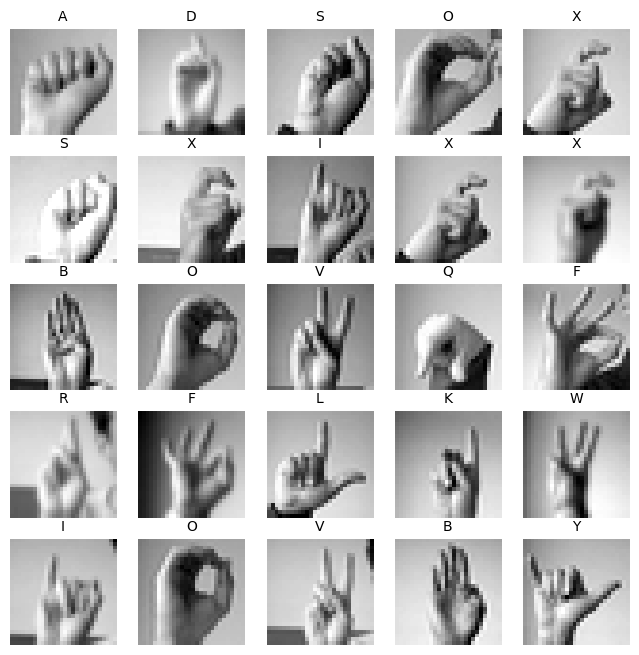

In [31]:
# visualizing random images from the training set
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
train_len = X_train.shape[0]

for ax in axs.reshape(-1):
    idx = np.random.randint(train_len)
    ax.set_title(label_map[y_train[idx]], size=10)
    ax.axis('off')
    ax.imshow(X_train[idx].reshape((28,28)), cmap='gray');

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [33]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)


In [37]:
joblib.dump(lda, 'lda_model.pkl')

['lda_model.pkl']

In [34]:
from sklearn.metrics import accuracy_score

models_data = {}

def model_fit_and_print_acc(model):
    start_train = timer()
    model.fit(X_train, y_train)
    end_train = timer()
    start_pred = timer()
    train_pred = model.predict(X_train)
    end_pred = timer()
    train_acc = accuracy_score(train_pred, y_train)
    print("Train accuracy: ", train_acc)
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(test_pred, y_test)
    print("Test accuracy: ", test_acc)
    return [end_train-start_train, end_pred-start_pred, train_acc, test_acc]

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)
models_data['KNN'] = model_fit_and_print_acc(knn)

Train accuracy:  0.9986776197154879
Test accuracy:  0.8103736754043502


In [36]:
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']